# Flu Trends - Exploratory Data Analysis

Explore the dataset `flu_trends.csv` to uncover trends, seasonality and other hidden patterns within the data.

# Setup Notebook

## Import

In [1]:
# Import Standard Libraries
import pandas as pd
from pathlib import Path
import os

# Import Package Modules
from src.general_utils.general_utils import (
    read_configuration, 
    read_data_from_config
)
from src.exploratory_data_analysis.exploratory_data_analysis_utils import (
    set_plot_characteristics,
    plot_time_series
)

## Define Configuration

In [2]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'flu_trends_config.yaml')

# Extract configuration variables
dataset_config = config['dataset_config']
plot_characteristics = config['plot_characteristics']

[06/12/2024 16:49:17 - general_utils] INFO - read_configuration - Start
[06/12/2024 16:49:17 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml
[06/12/2024 16:49:17 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml read successfully
[06/12/2024 16:49:17 - general_utils] INFO - read_configuration - End


## Setup Plot Characteristics

In [3]:
set_plot_characteristics(plot_characteristics)

[06/12/2024 16:49:17 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Start
[06/12/2024 16:49:17 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Creating theme parameters
[06/12/2024 16:49:17 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - End


# Read Data

In [4]:
# Read dataset
data = read_data_from_config(dataset_config)

[06/12/2024 16:49:20 - general_utils] INFO - read_data_from_config - Start
[06/12/2024 16:49:20 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/12/2024 16:49:20 - general_utils] INFO - build_path_from_list - Start
[06/12/2024 16:49:20 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/12/2024 16:49:20 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/12/2024 16:49:20 - general_utils] INFO - build_path_from_list - End
[06/12/2024 16:49:20 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/flu_trends.csv
[06/12/2024 16:49:20 - general_utils] INFO - read_data_from_config - Reading data without date columns
[06/12/2024 16:49:20 - general_utils] INFO - read_data_from_config - Successfully read data with 366 rows and 131 columns
[06/12/2024 16:49:20 - general_utils] INFO - read_data_from_config - End


In [5]:
# Set index and drop unnecessary columns
data = (data.set_index(pd.PeriodIndex(data['Week'], freq='W'))
        .drop(columns=[column for column in data.columns if column != 'FluVisits']))

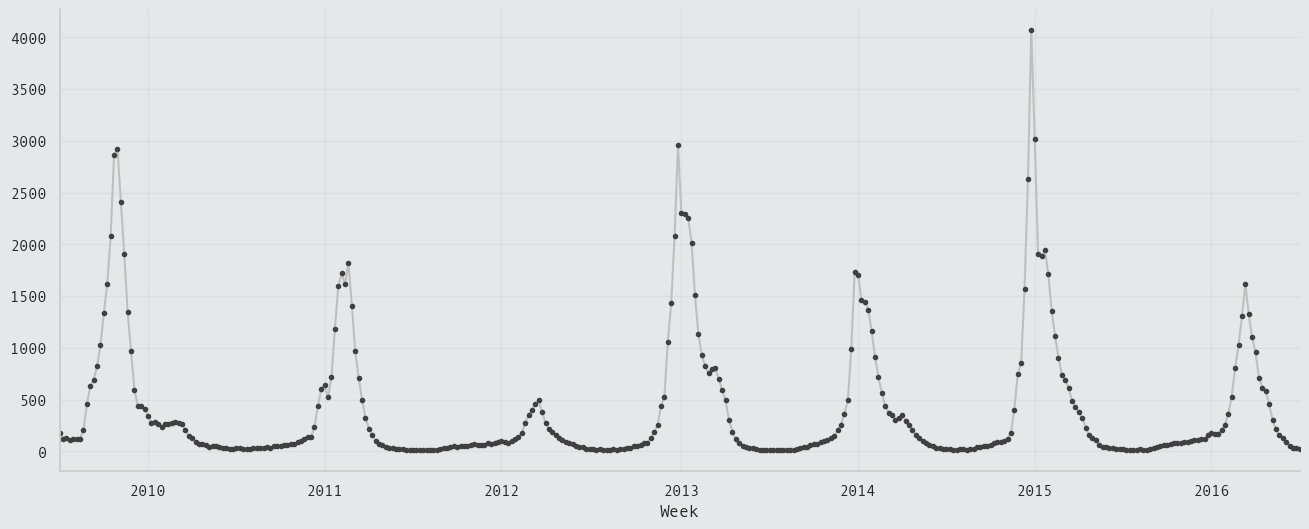

In [6]:
plot_time_series(data)